# Compute disorder 

## Import the libraries ##

In [1]:
%matplotlib inline

from LinearChain import *
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.integrate import ode
from scipy.integrate import quad
from scipy import stats
import numpy as np
import multiprocessing as mp
exec(open("fig_settings.py").read())

## Global parameters ##

The parameter *std_dev_rel* defines the intencity of the desorder.
- a is the reference forward rate
- b is the reference backward rate

In [3]:
samples = 10000
a = 2
b = 1
std_dev_rel = 0.7
def µ_and_σ(x,std_dev_rel):
    variance_rel = std_dev_rel**2
    σ_x_square = np.log(1 + (variance_rel*x**2)/(x**2))
    µ_x = np.log(x) - 0.5*(σ_x_square)
    σ_x = np.sqrt(σ_x_square)
    return(µ_x,σ_x)

The run is a bit long so it is preferable to load a multiprocessing library.

The function *compute_one_time* generates random parameters. the random parameters are distributed according a log-normal law because we want them to be positive.

In [4]:
q = mp.Queue()
def compute_one_time(q,n,disorder):
    µ_a = disorder[0]
    σ_a = disorder[1]
    µ_b = disorder[2]
    σ_b = disorder[3]
    As = np.random.lognormal(µ_a,σ_a,n+1)            
    Bs = np.random.lognormal(µ_b,σ_b,n+1)         
    param_perturb = np.ravel(np.transpose([As,Bs]))         
    J = np.array(compute_jacobian_MA(n,param_perturb))
    tau = compute_tau(J)[0]
    T = compute_lifetime(J,1)    
    q.put((tau,T))
q = mp.Queue()

## Run with a disorder of 70% ##

In [5]:
sizes = []
tau_ref = []
tau_perturb_70 = []
T_perturb_70 = []
µ_a,σ_a = µ_and_σ(a,0.7)
µ_b,σ_b = µ_and_σ(b,0.7)
disorder = [µ_a,σ_a,µ_b,σ_b]
T_ref = []
tau_ref = []
for n in range(2,80,5):
    sizes.append(n)
    param = [a,b]*(n+1)
    Jref = np.array(compute_jacobian_MA(n,param))
    T_ref.append(compute_lifetime(Jref,1))
    tau_ref.append(1/(a+b - 2*np.sqrt(a*b)*np.cos(np.pi/(n+1))))
    print("Chain length: %d"%n)
    tauTemp = np.array([])
    TTemp = np.array([])
    i=0    
    while i < samples:
         montecarlos = [compute_one_time(q,n,disorder) for fargs in range(10)]
         jobs = [mp.Process(mc) for mc in montecarlos]
         for job in jobs: job.start()
         for job in jobs: job.join()
         results1 = np.squeeze([q.get() for mc in montecarlos])
         results1[results1!=0]         
         tauTemp = np.append(tauTemp,results1[:,0])
         TTemp = np.append(TTemp,results1[:,1])         
         i += len(results1)    
    tau_perturb_70.append(np.array(tauTemp))
    T_perturb_70.append(np.array(TTemp))
tau_perturb_70 = np.array(tau_perturb_70)
T_perturb_70 = np.array(T_perturb_70)

Chain length: 2
Chain length: 7
Chain length: 12
Chain length: 17
Chain length: 22
Chain length: 27
Chain length: 32
Chain length: 37
Chain length: 42
Chain length: 47
Chain length: 52
Chain length: 57
Chain length: 62
Chain length: 67
Chain length: 72
Chain length: 77


### Analysis  ###

In [6]:
results_tau_70 = np.apply_along_axis(lambda x:confidence_interval(x,0.682),1,tau_perturb_70)
results_T_70 = np.apply_along_axis(lambda x:confidence_interval(x,0.682),1,T_perturb_70)


## Run with a disorder of 30% ##

In [7]:
sizes = []
tau_ref = []
tau_perturb_30 = []
T_perturb_30 = []
µ_a,σ_a = µ_and_σ(a,0.3)
µ_b,σ_b = µ_and_σ(b,0.3)
disorder = [µ_a,σ_a,µ_b,σ_b]
T_ref = []
tau_ref = []
for n in range(2,80,5):
    sizes.append(n)
    param = [a,b]*(n+1)
    Jref = np.array(compute_jacobian_MA(n,param))
    T_ref.append(compute_lifetime(Jref,1))
    tau_ref.append(1/(a+b - 2*np.sqrt(a*b)*np.cos(np.pi/(n+1))))
    print("Chain length: %d"%n)
    tauTemp = np.array([])
    TTemp = np.array([])
    i=0    
    while i < samples:
         montecarlos = [compute_one_time(q,n,disorder) for fargs in range(10)]
         jobs = [mp.Process(mc) for mc in montecarlos]
         for job in jobs: job.start()
         for job in jobs: job.join()
         results1 = np.squeeze([q.get() for mc in montecarlos])
         results1[results1!=0]         
         tauTemp = np.append(tauTemp,results1[:,0])
         TTemp = np.append(TTemp,results1[:,1])         
         i += len(results1)    
    tau_perturb_30.append(np.array(tauTemp))
    T_perturb_30.append(np.array(TTemp))
tau_perturb_30 = np.array(tau_perturb_30)
T_perturb_30 = np.array(T_perturb_30)

Chain length: 2
Chain length: 7
Chain length: 12
Chain length: 17
Chain length: 22
Chain length: 27
Chain length: 32
Chain length: 37
Chain length: 42
Chain length: 47
Chain length: 52
Chain length: 57
Chain length: 62
Chain length: 67
Chain length: 72
Chain length: 77


In [8]:
results_tau_30 = np.apply_along_axis(lambda x:confidence_interval(x,0.682),1,tau_perturb_30)
results_T_30 = np.apply_along_axis(lambda x:confidence_interval(x,0.682),1,T_perturb_30)

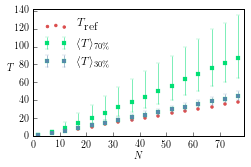

In [14]:
ms_size=6
rc('lines',markersize=3.3)
rc('lines',linewidth=0.5)

fig = plt.figure()
ax = fig.add_axes([0.11, 0.15, 0.86, 0.84])
ax.yaxis.labelpad = 4
ax.xaxis.labelpad = 0
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.errorbar(sizes,results_T_70[:,0],yerr=[results_T_70[:,1],results_T_70[:,2]],markeredgecolor=mygreen,marker="s",fmt='o',capsize=2,label=r"$\langle T\rangle_{70\%}$",color=mygreen)
ax.errorbar(sizes,results_T_30[:,0],yerr=[results_T_30[:,1],results_T_30[:,2]],markeredgecolor=mygreen,marker="s",fmt='o',capsize=2,label=r"$\langle T\rangle_{30\%}$",color=myblue)

ax.scatter(sizes,T_ref,label=r"$T_{\mbox{ref}}$",s=ms_size,color = myred)

ax.set_xlabel(r"$N$")
ax.yaxis.labelpad = 4
ax.xaxis.labelpad = 2

vec = np.ravel([results_T_70[:,0]+results_T_70[:,2],results_T_30[:,0]+results_T_30[:,2],T_ref])
ylim_up = np.max(vec)*1.05
ylim_down = np.min(vec)*0.9
ax.set_xlim([sizes[0]-2,sizes[-1]+2])
ax.set_ylim([0,ylim_up])
ax.set_ylabel(r"$T$",rotation=0)
ax.legend(loc=2,frameon=0,framealpha=0,ncol=1)


fig.savefig("figures/disorder_T.pdf")


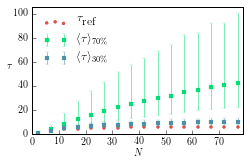

In [13]:
ms_size=6
rc('lines',markersize=3.3)
rc('lines',linewidth=0.5)

fig = plt.figure()
ax = fig.add_axes([0.11, 0.15, 0.86, 0.84])
ax.yaxis.labelpad = 4
ax.xaxis.labelpad = 0
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.errorbar(sizes,results_tau_70[:,0],yerr=[results_tau_70[:,1],results_tau_70[:,2]],markeredgecolor=mygreen,marker="s",fmt='o',capsize=2,label=r"$\langle \tau\rangle_{70\%}$",color=mygreen)
ax.errorbar(sizes,results_tau_30[:,0],yerr=[results_tau_30[:,1],results_tau_30[:,2]],markeredgecolor=mygreen,marker="s",fmt='o',capsize=2,label=r"$\langle \tau\rangle_{30\%}$",color=myblue)

ax.scatter(sizes,tau_ref,label=r"$\tau_{\mbox{ref}}$",s=ms_size,color = myred)

ax.set_xlabel(r"$N$")
ax.yaxis.labelpad = 4
ax.xaxis.labelpad = 2

vec = np.ravel([results_tau_70[:,0]+results_tau_70[:,2],results_tau_30[:,0]+results_tau_30[:,2],tau_ref])
ylim_up = np.max(vec)*1.05
ylim_down = np.min(vec)*0.9
ax.set_xlim([sizes[0]-2,sizes[-1]+2])
ax.set_ylim([0,ylim_up])
ax.set_ylabel(r"$\tau$",rotation=0)
ax.legend(loc=2,frameon=0,framealpha=0,ncol=1)


fig.savefig("figures/disorder_tau.pdf")